<p align="center"><h1><strong>Data Preprocessing for Prediction of future Coronary Heart Disease(CHD) in Framingham,Massachusetts</strong></h1></p>

In [47]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

#### The dataset is publicly available and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
#### The classification goal is to predict whether the patient has 10-year risk of future $Coronary$ $Heart$ $Disease$ (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes(excluding target variable).

In [48]:
df0=pd.read_csv('Dataset.csv')
df0

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [49]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [50]:
df0.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [51]:
print(df0.shape)
print(df0.columns)

(4238, 16)
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


### Data Cleaning

#### Firstly, We remove null values and duplicate values by using $dropna()$ and $dropduplicates()$ 

In [52]:
df1=df0.dropna()
df2=df1.drop_duplicates()
#df.isnull().sum()
df3=df2.reset_index(drop=True)
df3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


#### We now convert attributes like education,cigsPerDay and BPMeds to their relevent data types.

In [53]:
df3['education']=df3['education'].astype(int)
df3['cigsPerDay']=df3['cigsPerDay'].astype(int)
df3['BPMeds']=df3['BPMeds'].astype(int)
df3


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1,0,0,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1,1,1,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3,1,43,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
patients=df3.index
health_parameters=df3.columns
df3=df3.rename_axis("Patients", axis='rows').rename_axis("Health Parameters", axis='columns')

#### Sampling won't be advisable in this heart diease dataset as it is a public health dataset and the more the data,the better the prediction and lower the risk.

## Feature Subset Selection

### Filter Methods

#### Here,we are using Univariate Filter method by removing the features with the least variance,i.e. which are not important for the model.

In [55]:
# pd.set_option('display.float_format', '{:.6f}'.format)
# Assuming 'column_name' is the column from which you want to get the smallest values
variance=df3.var()
print(variance.nsmallest(3))

Health Parameters
prevalentStroke    0.005713
diabetes           0.026353
BPMeds             0.029447
dtype: float64


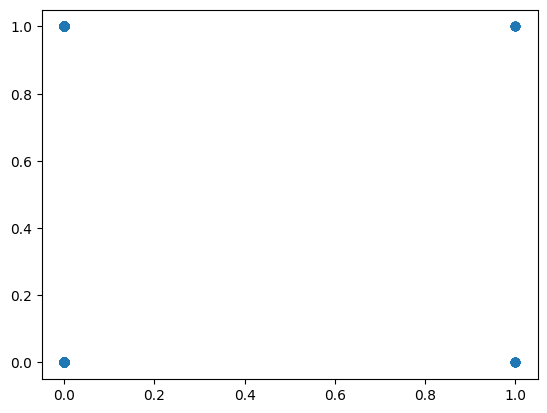

In [56]:
plt.scatter(df3.prevalentStroke,df3.TenYearCHD)
plt.show()

In [57]:
health_parameters=list(health_parameters)
health_parameters.remove('prevalentStroke')
df3 = df3.drop(['prevalentStroke'], axis=1)#ALso dropped 'prevalentStroke from health_parameters,i.e. list of columns
df3

Health Parameters,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Patients,,,,,,,,,,,,,,,
0,1,39,4,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1,0,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1,1,1,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1


#### Now we use $Correlation$ method to remove attributes with high correlation between them,i.e. there is a highj chance that change in one of the attribute may cause a change in the other.

In [58]:
corr_matrix = df3.corr().abs()
corr_matrix

Health Parameters,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Health Parameters,,,,,,,,,,,,,,,
male,1.000000,0.024387,0.017677,0.206778,0.331243,0.052128,0.000806,0.013833,0.070229,0.045484,0.051575,0.072867,0.114923,0.003048,0.091745
age,0.024387,1.000000,0.158961,0.210862,0.189099,0.134670,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,0.002685,0.118245,0.233810
education,0.017677,0.158961,1.000000,0.025253,0.013527,0.013647,0.079100,0.039547,0.012956,0.124511,0.058502,0.137280,0.064254,0.031874,0.063068
currentSmoker,0.206778,0.210862,0.025253,1.000000,0.773819,0.051936,0.107561,0.041859,0.051119,0.134371,0.115748,0.159574,0.050452,0.053346,0.019176
cigsPerDay,0.331243,0.189099,0.013527,0.773819,1.000000,0.046479,0.069890,0.036934,0.030222,0.094764,0.056650,0.086888,0.063549,0.053803,0.052159
BPMeds,0.052128,0.134670,0.013647,0.051936,0.046479,1.000000,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentHyp,0.000806,0.306693,0.079100,0.107561,0.069890,0.263047,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,0.039547,0.041859,0.036934,0.049051,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,0.070229,0.267764,0.012956,0.051119,0.030222,0.094011,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


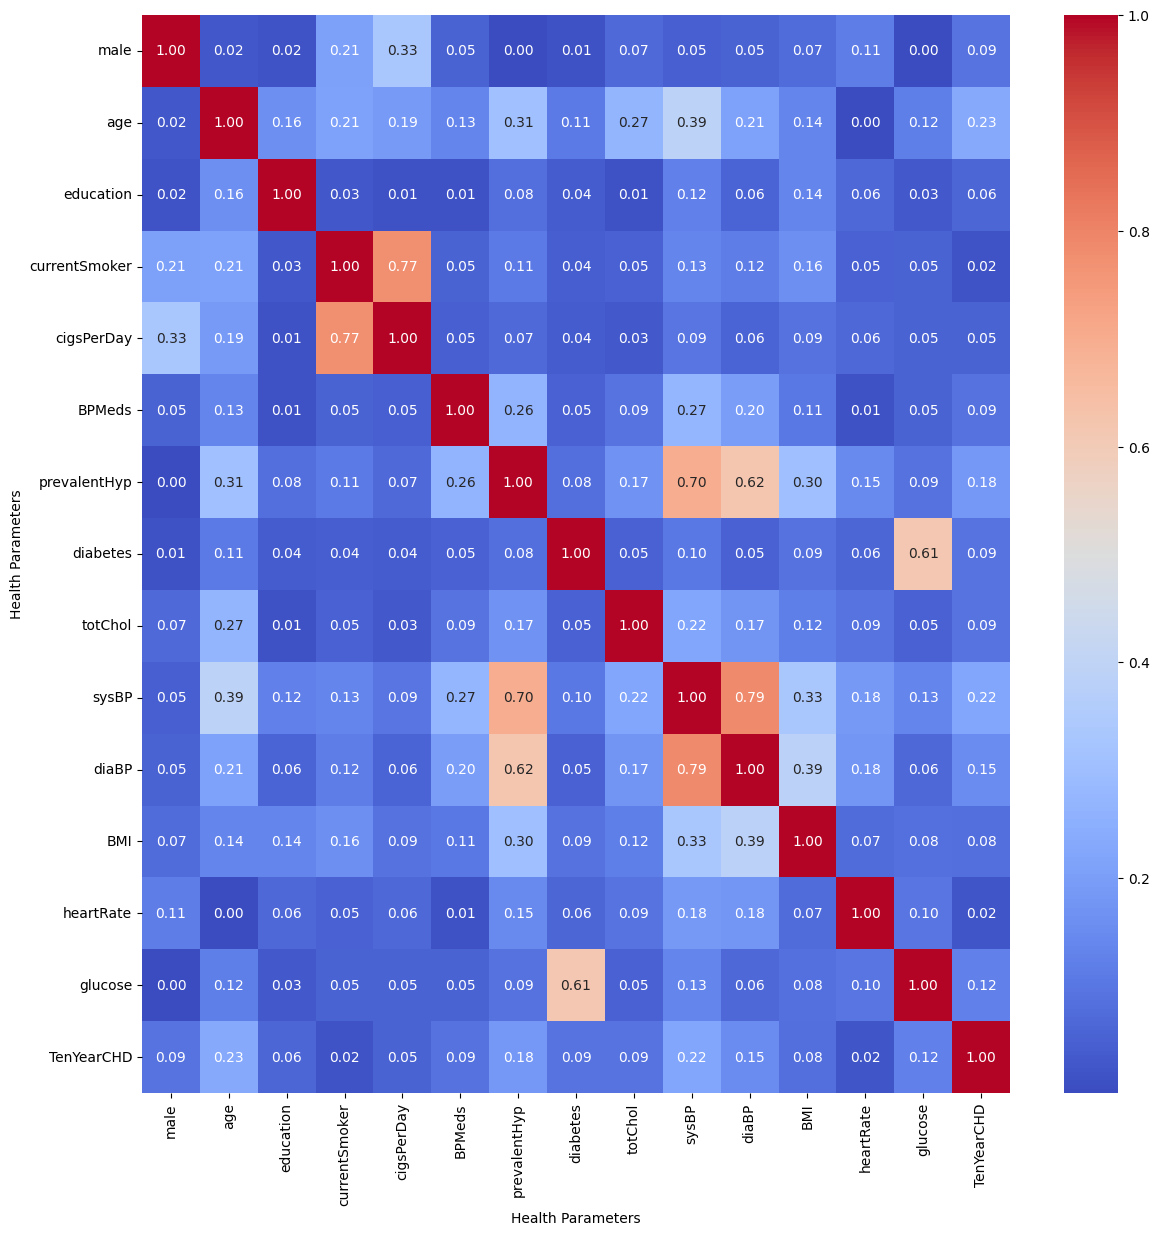

In [59]:
fig_dims = (14, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#### This shows the correlation coefficient between each unique pair of features in the dataset.

In [60]:
correlation={}#Dictionary with attributes and their correlation in descending order
for i in range(0, len(health_parameters)):
    for j in range(0, i):
            correlation[(health_parameters[i], health_parameters[j])]=corr_matrix.loc[health_parameters[i], health_parameters[j]]
sorted_correlation = dict(sorted(correlation.items(), key=lambda item: item[1],reverse=True))
sorted_correlation

{('diaBP', 'sysBP'): 0.7867271218652642,
 ('cigsPerDay', 'currentSmoker'): 0.7738189372482994,
 ('sysBP', 'prevalentHyp'): 0.6977899528655885,
 ('diaBP', 'prevalentHyp'): 0.617634221677018,
 ('glucose', 'diabetes'): 0.6148174441322215,
 ('sysBP', 'age'): 0.3885505988687022,
 ('BMI', 'diaBP'): 0.3856106779899647,
 ('cigsPerDay', 'male'): 0.3312428456443405,
 ('BMI', 'sysBP'): 0.33100358987482476,
 ('prevalentHyp', 'age'): 0.3066929974598801,
 ('BMI', 'prevalentHyp'): 0.3029168279134485,
 ('sysBP', 'BPMeds'): 0.27129113074113065,
 ('totChol', 'age'): 0.26776368401057793,
 ('prevalentHyp', 'BPMeds'): 0.26304685599848165,
 ('TenYearCHD', 'age'): 0.23381045046891855,
 ('TenYearCHD', 'sysBP'): 0.22288534193220752,
 ('sysBP', 'totChol'): 0.22012958127064888,
 ('currentSmoker', 'age'): 0.2108623680670528,
 ('diaBP', 'age'): 0.20888036151774653,
 ('currentSmoker', 'male'): 0.2067779295380288,
 ('diaBP', 'BPMeds'): 0.1997503069579374,
 ('cigsPerDay', 'age'): 0.18909948960681483,
 ('heartRate', '

#### Though Systole and Diastole blood pressure are highly correlated, we can't remove any of them as both are important to determine the disease and hence,needed for the model.

#### Since the correlation of currentSmoker and cigsPerDay is 0.77(high), we can remove one of the features by $Correlation$.

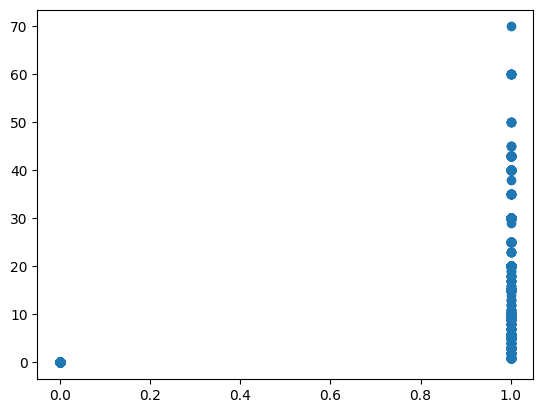

In [61]:
plt.scatter(df3.currentSmoker,df3.cigsPerDay)
plt.show()

In [62]:
df3.drop(['currentSmoker'], axis=1, inplace=True)
df3

Health Parameters,male,age,education,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Patients,,,,,,,,,,,,,,
0,1,39,4,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,30,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,23,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1,1,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1


#### Since the correlation of prevalentHyp with sysBP is 0.69(high), we can remove one of the features by $Correlation$.

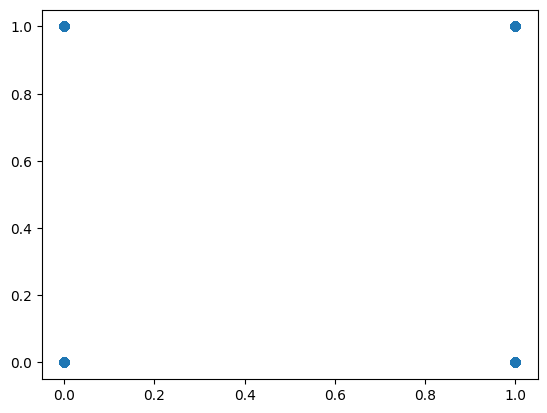

In [63]:
plt.scatter(df3.prevalentHyp,df3.TenYearCHD)
plt.show()

#### Since the correlation of $education$ attribute is less than the threshold for almost all attributes and doesn't have any meaningful impact on the target variable, we can drop it from the dataframe.

In [64]:
df3.drop(['prevalentHyp'], axis=1, inplace=True)
df3

Health Parameters,male,age,education,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Patients,,,,,,,,,,,,,
0,1,39,4,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,30,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,23,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1,0,0,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1,1,0,0,313.0,179.0,92.0,25.97,66.0,86.0,1


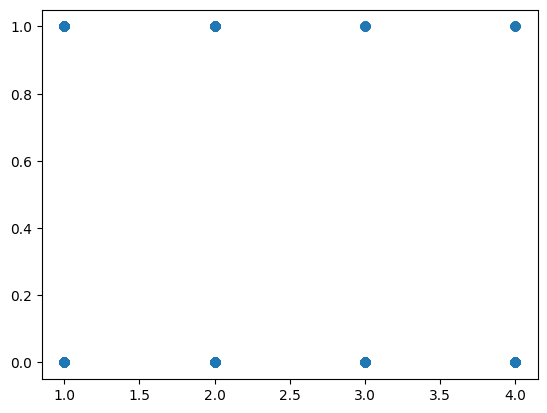

In [65]:
plt.scatter(df3.education,df3.TenYearCHD)
plt.show()

In [66]:
df3.drop(['education'], axis=1, inplace=True)
df3

Health Parameters,male,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Patients,,,,,,,,,,,,
0,1,39,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,0,0,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,0,0,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1,0,0,313.0,179.0,92.0,25.97,66.0,86.0,1


### Wrapper Methods

#### Backward Subset Selection

In [67]:
data = df3.drop('TenYearCHD', axis=1)
target = df3['TenYearCHD']

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linear_regression = LinearRegression()

backward_feature_selector = SequentialFeatureSelector(linear_regression, n_features_to_select=7, direction='backward')

backward_feature_selector.fit(data, target)

selected_features = data.columns[backward_feature_selector.get_support()]

print(selected_features)

Index(['male', 'age', 'cigsPerDay', 'sysBP', 'diaBP', 'heartRate', 'glucose'], dtype='object', name='Health Parameters')


In [69]:
data.to_csv('Dataset_cleaned.csv')